### Introduction

For this analysis we're going to be generating insights from the EDA of the dataset; "pharmaceutical-prices-in-pakistan.csv'. This is the first publicly available dataset of pharmaceutical prices in Pakistan. The dataset contains the maximum retail prices of medicines as set by the government in June 2021. It covers a wide range of drugs, including both branded and generic medications across various therapeutic categories. The data has been obtained from official government publications and price lists.

By analyzing this dataset, fellow data analysts can gain insights into the pricing trends and patterns of different drugs in Pakistan. The dataset can help researchers and public health experts to study the affordability and accessibility of essential medicines in Pakistan. The dataset can also be used by market analysts to track the performance of different pharmaceutical companies in the region. Furthermore, the dataset can be used to develop predictive models for drug prices, which could be valuable for both manufacturers and consumers. Overall, this dataset provides a unique opportunity for researchers and analysts to investigate the pricing dynamics of the pharmaceutical industry in Pakistan.

We're going to find the top 10 compnanies, medicine brands, formulations, and their pack size by MRP, and plot them against MRP.

### Limitations

The analysis faces severe limitations because it has no information on the actual retail price, wholesale price, costs, geographical data, dates of purchase, time of purchase, target segment, etc.

### Note:

The column mrp stands for Maximum Retail Price. It is the maximum price at which a pharmaceutical product can be sold to the end consumer (retail price). The MRP is usually printed on the packaging of the medicine or mentioned in the product information. It serves as a reference price that helps regulate the pricing of pharmaceutical products and protects consumers from excessive pricing.

### Import all relevant libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('../DataSets/Pakistan/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

DataSets/Pakistan/file.csv


### Load the dataset, review, and format.

In [20]:
df = pd.read_csv('DataSets/Pakistan/file.csv')
df.head()

,reg_no,Company Name,Brand Name,Formulation,Pack Size,MRP
0,55113,AGP Limited,ABNIL Capsule 120MG,Orlistat,30's,"Rs. 1,644.15"
1,55113,AGP Limited,ABNIL Capsule 120MG,Orlistat,20's,"Rs. 1,131.22"
2,42718,Jinnah Pharmaceuticals (Pvt.) Ltd.,Diabnil 1mg Tablet,Glimepiride ...1mg,2x10's,Rs. 141.11
3,42719,Jinnah Pharmaceuticals (Pvt.) Ltd.,Diabnil 2mg Tablet,Glimepiride …2mg,2x10's,Rs. 258.78
4,42720,Jinnah Pharmaceuticals (Pvt.) Ltd.,Diabnil 3mg Tablet,Glimepiride …3mg,2x10's,Rs. 423.32


In [21]:
df.shape

(462, 6)

### Converting column names/headers to a more standardized format

In [22]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['reg_no', 'company_name', 'brand_name', 'formulation', 'pack_size',
       'mrp'],
      dtype='object')

In [23]:
df = df.rename(columns={'mrp': 'mrp_rs'})
print(df)

     reg_no                                       company_name  \
0     55113                                        AGP Limited   
1     55113                                        AGP Limited   
2     42718                 Jinnah Pharmaceuticals (Pvt.) Ltd.   
3     42719                 Jinnah Pharmaceuticals (Pvt.) Ltd.   
4     42720                 Jinnah Pharmaceuticals (Pvt.) Ltd.   
..      ...                                                ...   
457   83991  GlaxoSmithKline Consumer Healthcare Pakistan L...   
458   83991  GlaxoSmithKline Consumer Healthcare Pakistan L...   
459   89372  GlaxoSmithKline Consumer Healthcare Pakistan L...   
460   89372  GlaxoSmithKline Consumer Healthcare Pakistan L...   
461   89372  GlaxoSmithKline Consumer Healthcare Pakistan L...   

              brand_name                      formulation pack_size  \
0    ABNIL Capsule 120MG                         Orlistat      30's   
1    ABNIL Capsule 120MG                         Orlistat      20

### Converting the column mrp into a numerical float

In [24]:
df['mrp_rs'] = df['mrp_rs'].str.replace('Rs.', '').str.replace(' ', '')

# Format the numbers by removing the comma and converting the column to float
df['mrp_rs'] = df['mrp_rs'].str.replace(',', '').astype(float)

# Verify the changes
print(df['mrp_rs'])

0      1644.15
1      1131.22
2       141.11
3       258.78
4       423.32
        ...   
457     349.78
458      83.51
459     316.38
460     525.49
461     420.93
Name: mrp_rs, Length: 462, dtype: float64


In [25]:
df.columns
df.head()

,reg_no,company_name,brand_name,formulation,pack_size,mrp_rs
0,55113,AGP Limited,ABNIL Capsule 120MG,Orlistat,30's,1644.15
1,55113,AGP Limited,ABNIL Capsule 120MG,Orlistat,20's,1131.22
2,42718,Jinnah Pharmaceuticals (Pvt.) Ltd.,Diabnil 1mg Tablet,Glimepiride ...1mg,2x10's,141.11
3,42719,Jinnah Pharmaceuticals (Pvt.) Ltd.,Diabnil 2mg Tablet,Glimepiride …2mg,2x10's,258.78
4,42720,Jinnah Pharmaceuticals (Pvt.) Ltd.,Diabnil 3mg Tablet,Glimepiride …3mg,2x10's,423.32


### Counting all column values

In [26]:
print(f'reg_no: {df.reg_no.count()}')
print(f'company_name: {df.company_name.count()}')
print(f'brand_name: {df.brand_name.count()}')
print(f'formulation: {df.formulation.count()}')
print(f'pack_size: {df.pack_size.count()}')
print(f'mrp: {df.mrp_rs.count()}')

reg_no: 462
company_name: 462
brand_name: 462
formulation: 462
pack_size: 462
mrp: 447


### Counting all unique values

In [27]:
print(f'reg_no: {df.reg_no.nunique()}')
print(f'company_name: {df.company_name.nunique()}')
print(f'brand_name: {df.brand_name.nunique()}')
print(f'formulation: {df.formulation.nunique()}')
print(f'pack_size: {df.pack_size.nunique()}')
print(f'mrp: {df.mrp_rs.nunique()}')

reg_no: 343
company_name: 64
brand_name: 330
formulation: 334
pack_size: 124
mrp: 408


### Data type for each column

In [28]:
print(f'reg_no: {df.reg_no.dtype}')
print(f'company_name: {df.company_name.dtype}')
print(f'brand_name: {df.brand_name.dtype}')
print(f'formulation: {df.formulation.dtype}')
print(f'pack_size: {df.pack_size.dtype}')
print(f'mrp: {df.mrp_rs.dtype}')

reg_no: int64
company_name: object
brand_name: object
formulation: object
pack_size: object
mrp: float64


### Checking for NULL VALUES

In [29]:
print(f'reg_no: {df.reg_no.isnull().sum()}')
print(f'company_name: {df.company_name.isnull().sum()}')
print(f'brand_name: {df.brand_name.isnull().sum()}')
print(f'formulation: {df.formulation.isnull().sum()}')
print(f'pack_size: {df.pack_size.isnull().sum()}')
print(f'mrp: {df.mrp_rs.isnull().sum()}')

reg_no: 0
company_name: 0
brand_name: 0
formulation: 0
pack_size: 0
mrp: 15


In [30]:
df.describe().transpose

<bound method DataFrame.transpose of               reg_no       mrp_rs
count     462.000000   447.000000
mean    50915.424242   568.395213
std     32519.899556   861.609129
min        72.000000    12.940000
25%     22200.000000   140.810000
50%     55159.500000   292.210000
75%     78074.250000   609.220000
max    103612.000000  8085.930000>

### Calculate the top 10 companies with the highest MRP

In [31]:
top_20_highest_mrp = df.nlargest(20, 'mrp_rs')
print("Top 20 Companies with the Highest MRP:")
print(top_20_highest_mrp[['mrp_rs', 'brand_name', 'company_name']])

Top 20 Companies with the Highest MRP:
      mrp_rs                    brand_name  \
266  8085.93           Lipiget Tablet 40mg   
175  6463.37         Renocept Tablet 500mg   
369  5079.54         Inosita 100 mg Tablet   
178  4748.15          Tenova 300 mg Tablet   
181  4463.43        Tenosaf-B 300mg Tablet   
187  4463.43        Tenorains 300mg Tablet   
263  3883.79           Lipiget Tablet 20mg   
376  3395.11         Inosita 100 mg Tablet   
393  3174.66          SITAGLU 100mg Tablet   
33   3110.54          Aprovel Tablet 300mg   
35   3109.07  Co-Aprovel Tablet 300/12.5mg   
36   3109.07    Co-Aprovel Tablet 300/25mg   
372  3102.98   Inosita Plus 50/1000 Tablet   
265  3084.40           Lipiget Tablet 40mg   
373  3072.29    Inosita Plus 50/500 Tablet   
371  3041.59          Inosita 50 mg Tablet   
180  2985.40          Teno-Alf 25mg Tablet   
174  2585.35         Renocept Tablet 500mg   
260  2228.41           Lipiget Tablet 10mg   
378  2056.93   Inosita Plus 50/1000 Table

In [32]:
# Calculate the sum and average of MRP for each company
mrp_sum = df.groupby('company_name')['mrp_rs'].sum()
mrp_average = df.groupby('company_name')['mrp_rs'].mean()

# Display the sum and average MRP for each company
print("Sum of MRP by Company:")
print(mrp_sum)

print("\nAverage MRP by Company:")
print(mrp_average)

Sum of MRP by Company:
company_name
AGP Limited                                 3710.01
ARP (Pvt) Limited                           1998.70
ATCO Laboratories Ltd.                       610.38
Abbott Laboratories (Pakistan) Limited      3886.00
Amarant Pharmaceuticals Private Limited      512.61
                                             ...   
Shaigan Pharmaceuticals (Pvt.) Ltd.         2096.57
Tabros Pharma (Pvt) Ltd.                   10516.28
The Searle Company Limited                  2449.27
Wilshire Laboratories (Pvt) Ltd.            1132.81
Wimits Pharmaceuticals Pvt. Ltd             2646.55
Name: mrp_rs, Length: 64, dtype: float64

Average MRP by Company:
company_name
AGP Limited                                742.002000
ARP (Pvt) Limited                          999.350000
ATCO Laboratories Ltd.                     122.076000
Abbott Laboratories (Pakistan) Limited     215.888889
Amarant Pharmaceuticals Private Limited    256.305000
                                           

Top 10 Companies with the Highest MRP Sum:
company_name
Pharmevo (Pvt.) Ltd.                    36711.15
Getz Pharma (Pvt.) Limited              35180.89
Sanofi-aventis Pakistan limited         15716.23
Hilton Pharma (Pvt) Ltd.                13229.42
Saffron Pharmaceuticals (Pvt.) Ltd.,    13152.42
Global Pharmaceuticals (Pvt.) Ltd.      11940.67
Tabros Pharma (Pvt) Ltd.                10516.28
Pfizer Pakistan Limited                  7852.45
GlaxoSmithKline Pakistan Ltd.            6889.70
Macter International Limited             6239.37
Name: mrp_rs, dtype: float64


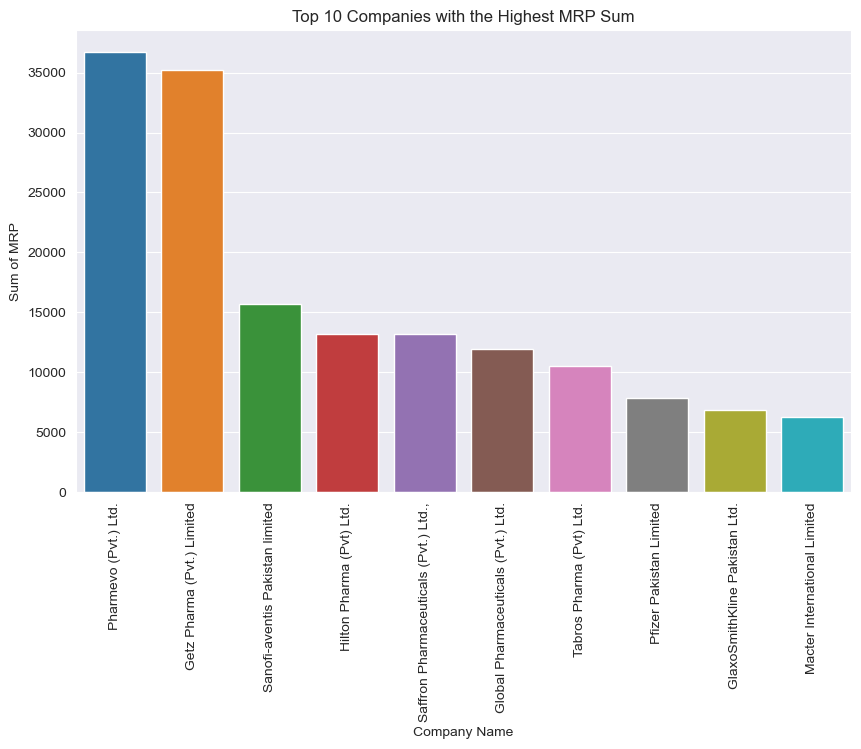

In [33]:
# Calculate the top 10 companies with the highest MRP sum
top_10_highest_mrp_sum = mrp_sum.nlargest(10)
print("Top 10 Companies with the Highest MRP Sum:")
print(top_10_highest_mrp_sum)

# Plotting the sum of MRP for top 10 companies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_highest_mrp_sum.index, y=top_10_highest_mrp_sum.values)
plt.xlabel('Company Name')
plt.ylabel('Sum of MRP')
plt.title('Top 10 Companies with the Highest MRP Sum')
plt.xticks(rotation=90)
plt.show()

### Top 10 medicine brands with the highest MRP¶

Top 10 Brands with the Highest MRP Sum:
                    Brand Name   MRP Sum
0          Lipiget Tablet 40mg  12288.07
1        Renocept Tablet 500mg  10341.39
2        Inosita 100 mg Tablet   8474.65
3          Lipiget Tablet 20mg   6006.08
4          Telsitan - H Tablet   5669.10
5  Inosita Plus 50/1000 Tablet   5159.91
6   Inosita Plus 50/500 Tablet   5109.06
7         Inosita 50 mg Tablet   5074.59
8         Tenova 300 mg Tablet   4748.15
9       Tenorains 300mg Tablet   4463.43


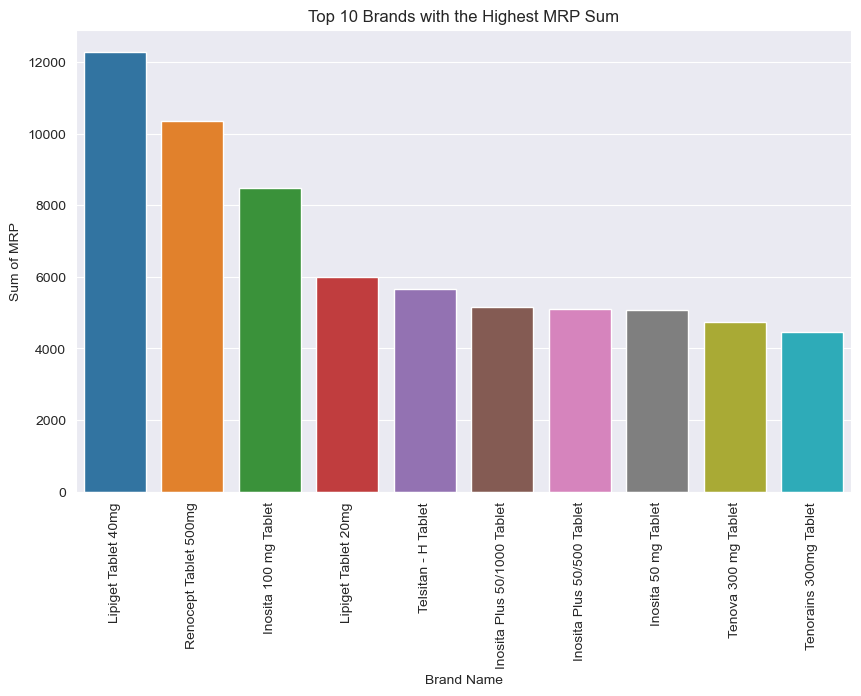

In [34]:
# Calculate the sum of MRP for each brand
mrp_sum_brand = df.groupby('brand_name')['mrp_rs'].sum()

# Find the top 10 brands with the highest MRP sum
top_10_highest_mrp_brands = mrp_sum_brand.nlargest(10)

# Create a table for the top 10 brands with their corresponding MRP sums
top_10_brand_table = pd.DataFrame({'Brand Name': top_10_highest_mrp_brands.index, 'MRP Sum': top_10_highest_mrp_brands.values})

# Display the top 10 brands table
print("Top 10 Brands with the Highest MRP Sum:")
print(top_10_brand_table)

# Plotting the sum of MRP for top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand Name', y='MRP Sum', data=top_10_brand_table)
plt.xlabel('Brand Name')
plt.ylabel('Sum of MRP')
plt.title('Top 10 Brands with the Highest MRP Sum')
plt.xticks(rotation=90)
plt.show()

### Top 10 medicine formulation with the highest MRP

Top 10 Formulations with the Highest MRP Sum:
                                         Formulation   MRP Sum
0  Each film-coated Tablet contains: Atorvastatin...  12288.07
1  Each Tablet contains: Mycophenolate Mofetil…50...  10341.39
2  Each film-coated Tablet contains: Atorvastatin...   6006.08
3                                Sitagliptin…..100mg   5079.54
4                                   Tenofovir……300mg   4748.15
5  Each Tablet contains: Tenovofir disproxil fuma...   4463.43
6  Tenofovir Disoproxil Fumarate e.q to Tenofovir...   4463.43
7                        Tenofovir Alafenamide….25mg   3980.90
8              Sitagliptin + Metformin Hydrochloride   3826.85
9                                Sitagliptin…….100mg   3395.11


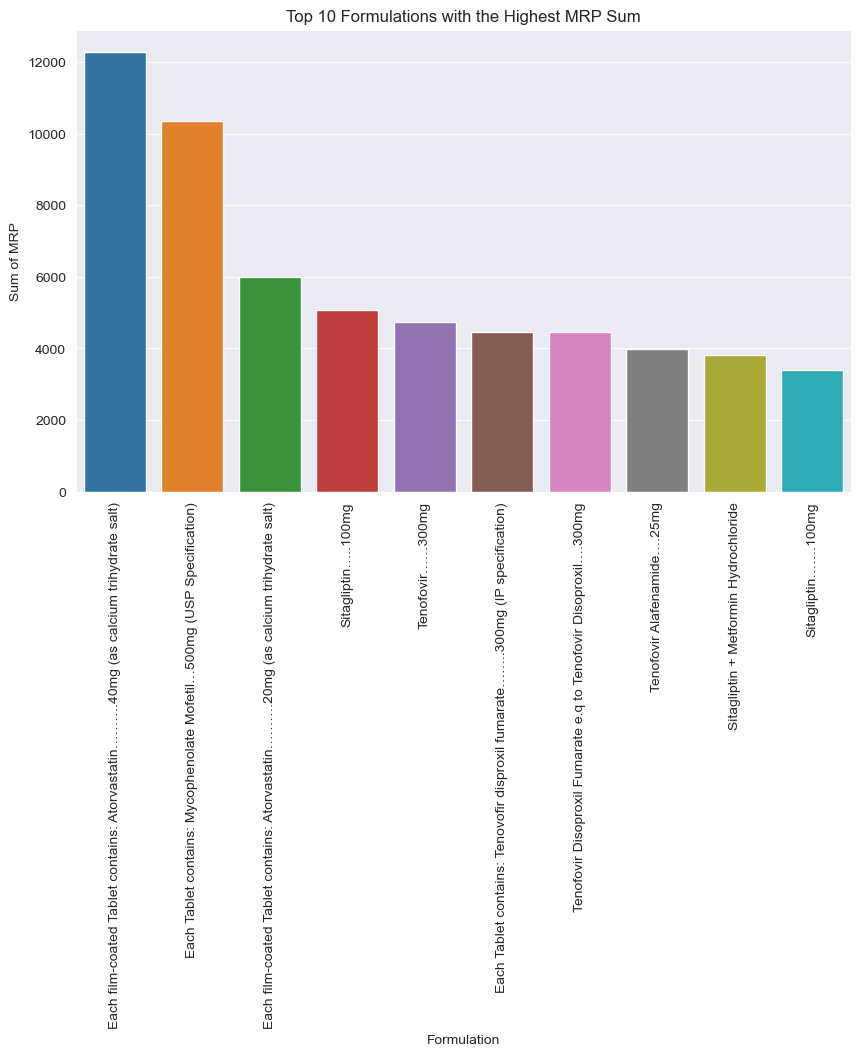

In [35]:
# Calculate the sum of MRP for each formulation
mrp_sum_formulation = df.groupby('formulation')['mrp_rs'].sum()

# Find the top 10 formulations with the highest MRP sum
top_10_highest_mrp_formulations = mrp_sum_formulation.nlargest(10)

# Create a table for the top 10 formulations with their corresponding MRP sums
top_10_formulation_table = pd.DataFrame({'Formulation': top_10_highest_mrp_formulations.index, 'MRP Sum': top_10_highest_mrp_formulations.values})

# Display the top 10 formulations table
print("Top 10 Formulations with the Highest MRP Sum:")
print(top_10_formulation_table)

# Plotting the sum of MRP for top 10 formulations
plt.figure(figsize=(10, 6))
sns.barplot(x='Formulation', y='MRP Sum', data=top_10_formulation_table)
plt.xlabel('Formulation')
plt.ylabel('Sum of MRP')
plt.title('Top 10 Formulations with the Highest MRP Sum')
plt.xticks(rotation=90)
plt.show()

### Top 10 Pack Size with the highest MRP

Top 10 Pack Sizes with the Highest MRP Sum:
     Pack Size   MRP Sum
0         14's  27537.01
1         30's  23654.63
2         10's  20653.89
3        100's  18722.93
4          28s  17469.04
5  28's (2x14)  12788.76
6         20's  11896.34
7     1 x 14's   9521.81
8         28's   7912.56
9         50's   7473.81


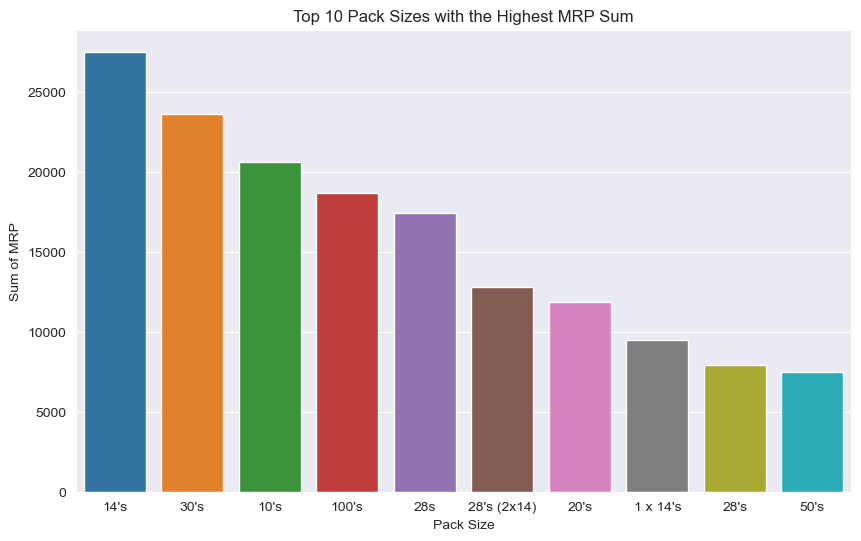

In [36]:
# Calculate the sum of MRP for each pack size
mrp_sum_pack_size = df.groupby('pack_size')['mrp_rs'].sum()

# Find the top 10 pack sizes with the highest MRP sum
top_10_highest_mrp_pack_sizes = mrp_sum_pack_size.nlargest(10)

# Create a table for the top 10 pack sizes with their corresponding MRP sums
top_10_pack_size_table = pd.DataFrame({'Pack Size': top_10_highest_mrp_pack_sizes.index, 'MRP Sum': top_10_highest_mrp_pack_sizes.values})

# Display the top 10 pack sizes table
print("Top 10 Pack Sizes with the Highest MRP Sum:")
print(top_10_pack_size_table)

# Plotting the sum of MRP for top 10 pack sizes
plt.figure(figsize=(10, 6))
sns.barplot(x='Pack Size', y='MRP Sum', data=top_10_pack_size_table)
plt.xlabel('Pack Size')
plt.ylabel('Sum of MRP')
plt.title('Top 10 Pack Sizes with the Highest MRP Sum')

plt.show()